In [1]:
import pandas as pd
import string 
import seaborn as sns
import matplotlib.pyplot as plt
import string 

In [2]:
url = '/Users/ayoubmoujane/Desktop/IG4_S7/Projet_datascience/mail.csv'
dtype={'To':'string', 'Subject':'string', 'X-From':'string',
       'X-To':'string', 'X-cc':'string', 'X-bcc':'string', 'X-Folder':'string', 'X-Origin':'string', 'X-FileName':'string',
       'content':'string', 'user':'string', 'Cat_1_level_1':'string', 'Cat_1_level_2':'string', 'Cat_1_weight':'string',
       'Cat_2_level_1':'string', 'Cat_2_level_2':'string', 'Cat_2_weight':'string', 'Cat_3_level_1':'string',
       'Cat_3_level_2':'string', 'Cat_3_weight':'string', 'Cat_4_level_1':'string', 'Cat_4_level_2':'string',
       'Cat_4_weight':'string', 'Cat_5_level_1':'string', 'Cat_5_level_2':'string', 'Cat_5_weight':'string',
       'Cat_6_level_1':'string', 'Cat_6_level_2':'string', 'Cat_6_weight':'string', 'Cat_7_level_1':'string',
       'Cat_7_level_2':'string', 'Cat_7_weight':'string', 'Cat_8_level_1':'string', 'Cat_8_level_2':'string',
       'Cat_8_weight':'string', 'Cat_9_level_1':'string', 'Cat_9_level_2':'string', 'Cat_9_weight':'string',
       'Cat_10_level_1':'string', 'Cat_10_level_2':'string', 'Cat_10_weight':'string', 'Cat_11_level_1':'string',
       'Cat_11_level_2':'string', 'Cat_11_weight':'string', 'Cat_12_level_1':'string', 'Cat_12_level_2':'string',
       'Cat_12_weight':'string'}
data = pd.read_csv(url,dtype=dtype)

# Creation d'une colonne nombre de caracteres

In [3]:
data['content_char_len'] = data['content'].apply(lambda x: len(x)  if (type(x)==type('str')) else 0)

In [4]:
#data.boxplot(column=['content_len'])
#Boxplot inexploitable

In [5]:
data['content_char_len'].describe()

count    100000.00000
mean       2158.93104
std        7370.24427
min           0.00000
25%         272.00000
50%         758.00000
75%        1854.00000
max      260461.00000
Name: content_char_len, dtype: float64

In [6]:
## Creating quantiles

In [7]:
content_char_length_q1 = data['content_char_len'].quantile(0.25)
content_char_length_q2 = data['content_char_len'].quantile(0.75)
content_char_length_q95 = data['content_char_len'].quantile(0.95)

In [8]:
data['content_char_length_category'] = data['content_char_len'].apply(lambda x: 'short message' if x<content_char_length_q1 else ('average message' if x<content_char_length_q2 else 'long message'))

In [9]:
data['content_char_length_category']

0          short message
1        average message
2          short message
3          short message
4          short message
              ...       
99995    average message
99996    average message
99997    average message
99998       long message
99999    average message
Name: content_char_length_category, Length: 100000, dtype: object

# Creation of a content word length column

In [10]:
data['content_word_len'] = data['content'].apply(lambda x: sum([i.strip(string.punctuation).isalpha() for i in x.split()])  if (type(x)==type('str')) else 0)

In [11]:
data['content_word_len'].describe()

count    100000.00000
mean        296.20993
std        1034.19512
min           0.00000
25%          38.00000
50%         105.00000
75%         253.00000
max       38084.00000
Name: content_word_len, dtype: float64

### Distribution analysis

+99% of the emails have less than 5000 words.

In [12]:
data['content_word_len'].quantile(0.99)

3262.1899999999005

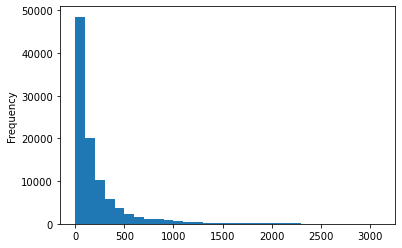

In [13]:
ax = data["content_word_len"].plot.hist(bins=range(0,3200,100))

### Narowing analysis to the first 90%

Trying to see the distribution of length

In [14]:
data['content_word_len'].quantile(0.91)

613.0

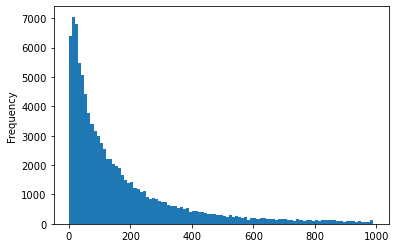

In [15]:
ax = data["content_word_len"].plot.hist(bins=range(0,1000,10))

## Defining email word length categories

According to https://www.campaignmonitor.com, the ideal email light is between 50 to 125 words

#### We decide to consider the following categories

content_word_len < 50 => "Short message" <br>
50 <= content_word_len < 125 => "Average message"

#### According to the distribution we are seeing, we arbitrarly decide to consider the following categories
125 <= content_word_len < 600 => "Long message" <br>
600 <= content_word_len => "Extra long message"


## Creating groups

In [16]:
content_word_length_q1 = 50
content_word_length_q2 = 125
content_word_length_q3 = 600

In [17]:
#data['content_word_length_category'] = data['content_word_len'].apply(lambda x: 'short message' if x<content_word_length_q1 else ('average message' if x<content_word_length_q2 else ('long message' if x<content_word_length_q3 else 'extra long message')))

data['content_word_length_category'] = data['content_word_len'].apply(lambda x: 1 if x<content_word_length_q1 else (2 if x<content_word_length_q2 else (3 if x<content_word_length_q3 else 4)))

Text(0.5, 0, 'content_word_length_category')

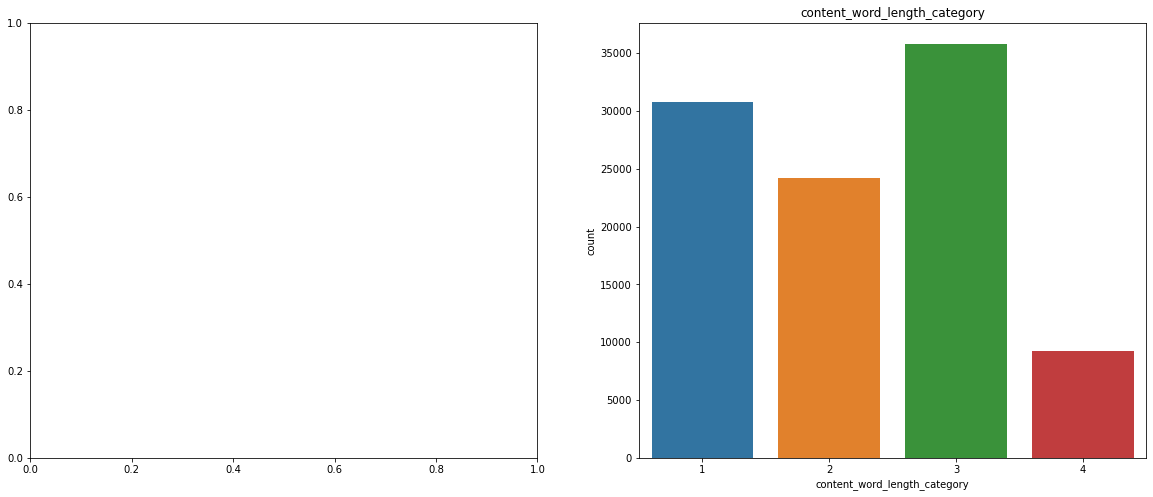

In [18]:
f,ax = plt.subplots(1,2,figsize=(20,8))

sns.countplot(x='content_word_length_category', data=data, ax=ax[1])
ax[1].set_title('content_word_length_category')
ax[1].set_xlabel('content_word_length_category')

# Getting the top 5 longest messages

In [19]:
data = data.sort_values("content_word_len",ascending=False)

In [20]:
data["content_word_len"].head(5)

75868    38084
56264    38084
74539    35397
58238    35397
73895    32437
Name: content_word_len, dtype: int64

# Cleaning the 'from' field

In [21]:
data["From"][1500]

"frozenset({'david.oxley@enron.com'})"

In [22]:
def clean_from_attribute (field):
    return field[field.find("{")+1:field.find("}")][1:-1]


In [23]:
 clean_from_attribute(data["From"][1500])

'david.oxley@enron.com'

In [24]:
data['From'] = data['From'].apply(lambda x: clean_from_attribute(x))

# Cleaning 'To' attribute

Some "To" fields are non existing to we create them and instanciate them with an empty list

In [25]:
data['To']

75868    frozenset({'joer@calpine.com', 'eileenk@calpin...
56264    frozenset({'joer@calpine.com', 'eileenk@calpin...
74539    frozenset({'markus.fiala@enron.com', 'roberta....
58238    frozenset({'markus.fiala@enron.com', 'roberta....
73895    frozenset({'joer@calpine.com', 'eileenk@calpin...
                               ...                        
40745    frozenset({'gmcvp1@aol.com', 'lsabbara@aol.com...
40588    frozenset({'gmcvp1@aol.com', 'lsabbara@aol.com...
10411               frozenset({'shanna.husser@enron.com'})
10412               frozenset({'shanna.husser@enron.com'})
70655    frozenset({'mark_guinney@watsonwyatt.com', 'je...
Name: To, Length: 100000, dtype: string

In [26]:
def clean_to_attribute (field):
    if isinstance(field,pd._libs.missing.NAType):
        return []
    else:
        first_clean = field[field.find("{")+1:field.find("}")].split(", ")
        second_clean = [email[1:-1] for email in first_clean]
        return second_clean
            

Example of empty To before cleaning

In [27]:
print(data["To"][188])

<NA>


Example of multiple To before cleaning

In [28]:
print(data["To"][23424])

frozenset({'michael.moscoso@enron.com', 'victor.guggenheim@enron.com', 'brent.price@enron.com', 'edward.coats@enron.com', 'kim.chick@enron.com', 'ilan.caplan@enron.com', 'sally.beck@enron.com', 'beth.apke@enron.com', 'leon.branom@enron.com', 'mason.hamlin@enron.com', 'leesa.white@enron.com', 'david.yang@enron.com', 'susan.scott@enron.com', 'richard.causey@enron.com', 'obed.cruz@enron.com'})


In [29]:
data["To"] = data["To"].apply(lambda x: clean_to_attribute(x))

Example of empty To after cleaning

In [30]:
print(data["To"][188])

[]


Example of multiple To after cleaning

In [31]:
print(data["To"][23424])

['michael.moscoso@enron.com', 'victor.guggenheim@enron.com', 'brent.price@enron.com', 'edward.coats@enron.com', 'kim.chick@enron.com', 'ilan.caplan@enron.com', 'sally.beck@enron.com', 'beth.apke@enron.com', 'leon.branom@enron.com', 'mason.hamlin@enron.com', 'leesa.white@enron.com', 'david.yang@enron.com', 'susan.scott@enron.com', 'richard.causey@enron.com', 'obed.cruz@enron.com']


# Counting the number of receivers

We create a "To_count" field counting the number of receivers

In [32]:
def count_receivers (field):
    return len(field)
            

In [33]:
data["To_count"] = data["To"].apply(lambda x: count_receivers(x))

Example of multiple receivers

In [34]:
data["To"][23424]

['michael.moscoso@enron.com',
 'victor.guggenheim@enron.com',
 'brent.price@enron.com',
 'edward.coats@enron.com',
 'kim.chick@enron.com',
 'ilan.caplan@enron.com',
 'sally.beck@enron.com',
 'beth.apke@enron.com',
 'leon.branom@enron.com',
 'mason.hamlin@enron.com',
 'leesa.white@enron.com',
 'david.yang@enron.com',
 'susan.scott@enron.com',
 'richard.causey@enron.com',
 'obed.cruz@enron.com']

In [35]:
data["To_count"][23424]

15

# Counting the number of times a user received an email

problem too long

In [186]:
def count_number_of_mail_received(user):
    count = 0
    for i in data["To"]:
        if user in i:
           count = count +1 
    return count

In [187]:
count_number_of_mail_received("jeff.dasovich@enron.com")

10098

In [189]:
data["Received"] = data["From"].apply(lambda x:count_number_of_mail_received(x))

KeyboardInterrupt: 

# Aggregation of user by email word count


In [181]:
grouped_user = data.groupby("From").agg({"content_word_len":"mean","To_count":"sum"})

In [182]:
grouped_user = grouped_user.sort_values("To_count",ascending=False)

In [183]:
grouped_user

,content_word_len,To_count
From,,
jeff.dasovich@enron.com,233.496028,58290
rhonda.denton@enron.com,36.518717,32290
ginger.dernehl@enron.com,212.947619,27840
jae.black@enron.com,305.431624,21084
l..denton@enron.com,36.670588,14146
...,...,...
ghkim@sk-enron.com,85.000000,0
root@chrivh40.cch.com,2497.000000,0
alex.huang@enron.com,29.000000,0


In [56]:
grouped_user.to_csv (r'./user_mail_activities.csv', index = False, header=True)

# Checking why some email have a To_count equal to 0

### (To work, must be done before data cleaning)
Answer : some "To" fields are <NA>


In [ ]:
grouped_user = data.groupby("From").agg({"To_count":"mean"})

In [8]:
# Get names of indexes for which column From is not equal to our example
indexNames = data[ data['From'] != "frozenset({'gina.peters@enron.com'})" ].index
# Delete these row indexes from dataFrame
data.drop(indexNames , inplace=True)

In [9]:
data

,Unnamed: 0,Message-ID,Date,From,To,Subject,X-From,X-To,X-cc,X-bcc,...,Cat_10_level_1,Cat_10_level_2,Cat_10_weight,Cat_11_level_1,Cat_11_level_2,Cat_11_weight,Cat_12_level_1,Cat_12_level_2,Cat_12_weight,labeled
23482,23482,<28533702.1075855811395.JavaMail.evans@thyme>,2000-01-18 11:02:00,frozenset({'gina.peters@enron.com'}),<NA>,Re: Global Risk Management Operations,Gina Peters,Rick Causey@ENRON,"Francisco Cabrera, Sally Beck@ECT",<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,False
25149,25149,<284542.1075855817339.JavaMail.evans@thyme>,2000-01-18 11:02:00,frozenset({'gina.peters@enron.com'}),<NA>,Re: Global Risk Management Operations,Gina Peters,Rick Causey@ENRON,"Francisco Cabrera, Sally Beck@ECT",<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,False


# Counting number of email received by a person

In [65]:
from itertools import groupby

In [176]:
receivers = []
for i in data["To"]:
    for j in i:
        receivers.append((j,1))

In [73]:
#receivers

In [177]:
email_received = pd.DataFrame.from_records(receivers, columns =['User', 'Emails received']) 

In [179]:
email_received

,User,Emails received
0,joer@calpine.com,1
1,eileenk@calpine.com,1
2,eric.eisenman@gen.pge.com,1
3,abb@eslawfirm.com,1
4,frank.derosa@gen.pge.com,1
...,...,...
725048,lcampbel@enron.com,1
725049,shanna.husser@enron.com,1
725050,shanna.husser@enron.com,1
725051,mark_guinney@watsonwyatt.com,1


In [174]:
email_received = email_received.groupby("User").agg({"Emails received":"sum"})
email_received = email_received.sort_values("Emails received",ascending=False)

In [175]:
email_received

,Emails received
User,
jeff.dasovich@enron.com,10098
sally.beck@enron.com,5277
susan.mara@enron.com,4261
james.steffes@enron.com,3742
paul.kaufman@enron.com,3579
...,...
kremer.todd@enron.com,1
krchoi@sk-enron.com,1
kramer.daniel@enron.com,1


In [98]:
email_received.to_csv (r'./user_mail_received.csv', index = False, header=True)

# Number of mail received by a person

In [133]:
from collections import Counter
#data["content"][99078]
Counter(" ".join(data["From"]).split()).most_common(50)

[('jeff.dasovich@enron.com', 9441),
 ('eric.bass@enron.com', 5122),
 ('sally.beck@enron.com', 4242),
 ('john.arnold@enron.com', 3492),
 ('david.delainey@enron.com', 2958),
 ('phillip.allen@enron.com', 2143),
 ('chris.dorland@enron.com', 1828),
 ('michelle.cash@enron.com', 1751),
 ('enron.announcements@enron.com', 1564),
 ('larry.campbell@enron.com', 1380),
 ('lynn.blair@enron.com', 1160),
 ('outlook.team@enron.com', 1115),
 ('no.address@enron.com', 1055),
 ('rick.buy@enron.com', 1023),
 ('dana.davis@enron.com', 890),
 ('james.derrick@enron.com', 885),
 ('susan.mara@enron.com', 825),
 ('mike.carson@enron.com', 719),
 ('owner-nyiso_tech_exchange@lists.thebiz.net', 712),
 ('shelley.corman@enron.com', 681),
 ('pete.davis@enron.com', 628),
 ('daren.farmer@enron.com', 578),
 ('owner-eveningmba@haas.berkeley.edu', 508),
 ('monika.causholli@enron.com', 487),
 ('sandra.brawner@enron.com', 480),
 ('40enron@enron.com', 479),
 ('james.steffes@enron.com', 473),
 ('ginger.dernehl@enron.com', 420),
 

In [132]:
len(Counter(" ".join(data["From"]).split()).most_common())

5543

# Most used words

In [127]:
from collections import Counter
most_used_words_data = data[0:90000]
Counter(" ".join(most_used_words_data["content"]).split()).most_common(100)

[('the', 1286955),
 ('to', 855228),
 ('and', 634057),
 ('of', 599582),
 ('a', 466343),
 ('in', 419776),
 ('for', 330007),
 ('>', 325757),
 ('is', 275765),
 ('on', 272616),
 ('that', 267628),
 ('be', 193255),
 ('you', 183737),
 ('will', 179289),
 ('I', 175528),
 ('with', 172668),
 ('The', 166273),
 ('at', 159118),
 ('have', 155040),
 ('by', 152004),
 ('this', 147952),
 ('are', 144026),
 ('as', 134944),
 ('=20', 133304),
 ('-', 125194),
 ('from', 122655),
 ('it', 116898),
 ('or', 113456),
 ('not', 103153),
 ('has', 99439),
 ('we', 94381),
 ('your', 87580),
 ('an', 87010),
 ('was', 85895),
 ('would', 82359),
 ('Enron', 79841),
 ('said', 73591),
 ('Subject:', 72820),
 ('To:', 72201),
 ('PM', 67478),
 ('power', 67010),
 ('its', 64315),
 ('=', 63323),
 ('if', 59148),
 ('can', 56693),
 ('but', 56341),
 ('our', 55356),
 ('he', 54839),
 ('any', 54705),
 ('which', 53545),
 ('all', 52992),
 ('about', 52030),
 ('they', 50893),
 ('more', 50809),
 ('been', 49269),
 ('AM', 48048),
 ('their', 46511),


# Listing every different email address from/sent/people contacted

In [237]:
user_activities=[]

def count_email_sent(array,df):
    for index, row in df.iterrows():
        array.append((row["From"],1,0,len(row["To"])))

def count_email_received(array,df):
    for i in data["To"]:
        for j in i:
            array.append((j,0,1,0))

            
count_email_sent(user_activities,data)
count_email_received(user_activities,data)

user_activities_df = pd.DataFrame.from_records(user_activities, columns =['User', 'Sent','Received','People Contacted']) 

In [238]:
user_activities_df

,User,Sent,Received,People Contacted
0,jmunoz@mcnallytemple.com,1,0,77
1,jmunoz@mcnallytemple.com,1,0,77
2,miyung.buster@enron.com,1,0,54
3,miyung.buster@enron.com,1,0,54
4,jmunoz@mcnallytemple.com,1,0,81
...,...,...,...,...
825048,lcampbel@enron.com,0,1,0
825049,shanna.husser@enron.com,0,1,0
825050,shanna.husser@enron.com,0,1,0
825051,mark_guinney@watsonwyatt.com,0,1,0


In [239]:
user_activities_df = user_activities_df.groupby("User").agg({"Sent":"sum","Received":"sum","People Contacted":"sum"})
user_activities_df = user_activities_df.sort_values("Sent",ascending=False)

In [240]:
user_activities_df

,Sent,Received,People Contacted
User,,,
jeff.dasovich@enron.com,9441,10098,58290
eric.bass@enron.com,5122,1400,10587
sally.beck@enron.com,4242,5277,13613
john.arnold@enron.com,3492,979,3685
david.delainey@enron.com,2958,651,5707
...,...,...,...
greg.hathaway@enron.com,0,2,0
greg.grissom@enron.com,0,4,0
greg.edwards@foothillspipe.com,0,3,0


In [241]:
user_activities_df.to_csv (r'./user_activities.csv', index = False, header=True)